In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
#import tensorflow as tf
#from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from  sklearn.preprocessing import OneHotEncoder
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

In [2]:
import torch
import torchvision

print(torch.cuda.device_count())
print(torch.version.cuda)
print(torch.version)
print(torch.cuda.is_available())

1
11.1
<module 'torch.version' from 'C:\\Users\\ozana\\anaconda3\\envs\\venv\\lib\\site-packages\\torch\\version.py'>
True


In [7]:
#!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Ab8pO3HNA4EBf2YOKkJc")
project = rf.workspace("mohamed-traore-2ekkp").project("gtsdb---german-traffic-sign-detection-benchmark")
dataset = project.version(3).download("yolov7")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to GTSDB---German-Traffic-Sign-Detection-Benchmark-3 in yolov7py


In [4]:

# run this cell to begin training
%cd C:\Users\ozana\Desktop\computer_vision\traffic-sign-recognition\yolov7

!python \
C:\Users\ozana\Desktop\computer_vision\traffic-sign-recognition\yolov7\train.py \
--batch 2 \
--epochs 1 \
--cfg C:\Users\ozana\Desktop\computer_vision\traffic-sign-recognition\yolov7\cfg\training\yolov7.yaml \
--weights C:\Users\ozana\Desktop\computer_vision\traffic-sign-recognition\yolov7\yolov7_training.pt \
--data {dataset.location}/data.yaml \
--device 0
        

C:\Users\ozana\Desktop\computer_vision\traffic-sign-recognition\yolov7
wandb: Install Weights & Biases for YOLOR logging with 'pip install wandb' (recommended)



YOLOR  v0.1-115-g072f76c torch 1.8.1+cu111 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4095.6875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=2, bbox_interval=-1, bucket='', cache_images=False, cfg='C:\\Users\\ozana\\Desktop\\computer_vision\\traffic-sign-recognition\\yolov7\\cfg\\training\\yolov7.yaml', data='C:\\Users\\ozana\\Desktop\\computer_vision\\traffic-sign-recognition\\GTSDB---German-Traffic-Sign-Detection-Benchmark-3/data.yaml', device='0', entity=None, epochs=10, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs\\train\\exp27', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=2, upload_dataset=False, v5_metric=False, weights='C:\\Users\\ozana\\Desktop\\computer_vis

In [5]:
!python detect.py \
--weights C:\Users\ozana\Desktop\computer_vision\traffic-sign-recognition\yolov7\runs\train\exp26\weights\best.pt \
--conf 0.1 \
--source {dataset.location}/test/images

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.1, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='C:\\Users\\ozana\\Desktop\\computer_vision\\traffic-sign-recognition\\GTSDB---German-Traffic-Sign-Detection-Benchmark-3/test/images', update=False, view_img=False, weights=['C:\\Users\\ozana\\Desktop\\computer_vision\\traffic-sign-recognition\\yolov7\\runs\\train\\exp26\\weights\\best.pt'])
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

Done. (211.7ms) Inference, (10.0ms) NMS
 The image with the result is saved in: runs\detect\exp9\00026_jpg.rf.4c55e8a72c668d5a0c4a948580757cd9.jpg
Done. (211.7ms) Inference, (0.0ms) NMS
 The image with the result is saved in: runs\detect\exp9\00028_jpg.rf.975675b221390ef694e0

YOLOR  v0.1-115-g072f76c torch 1.8.1+cu111 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4095.6875MB)

Model Summary: 314 layers, 36708320 parameters, 6194944 gradients, 103.9 GFLOPS


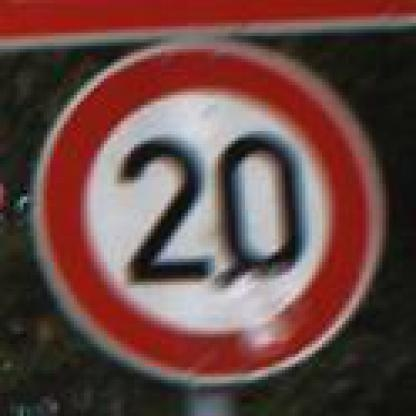

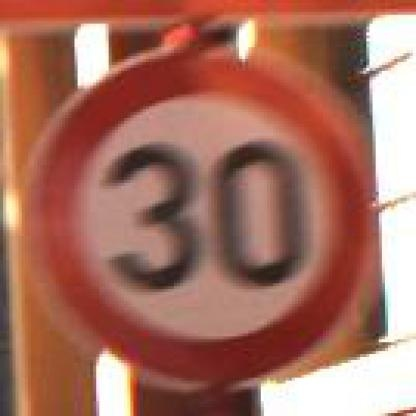

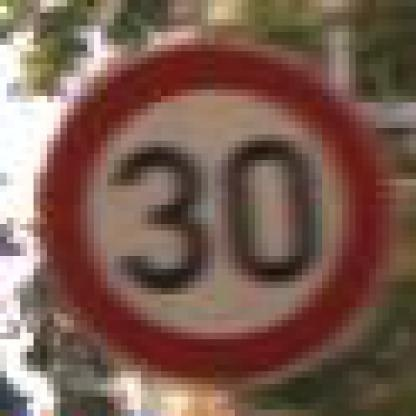

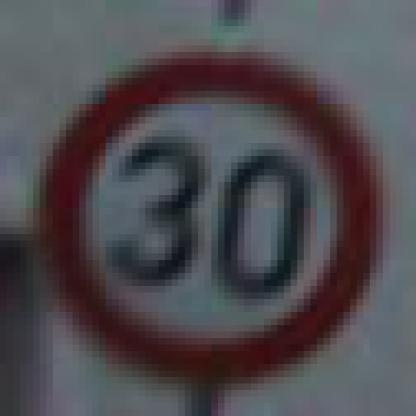

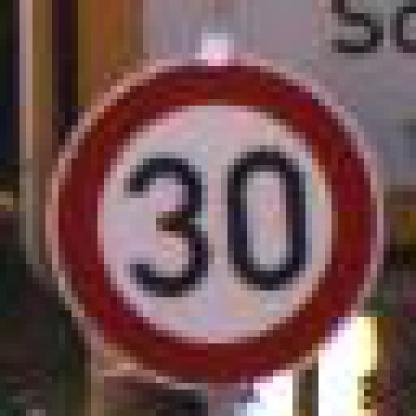

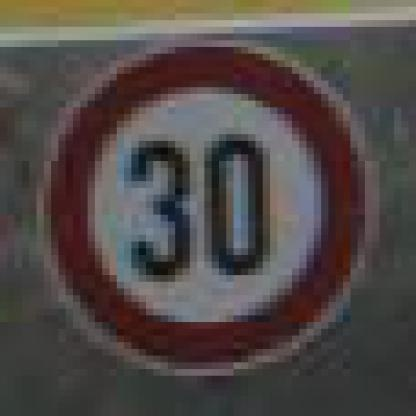

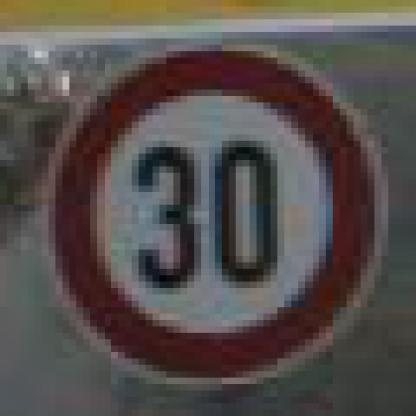

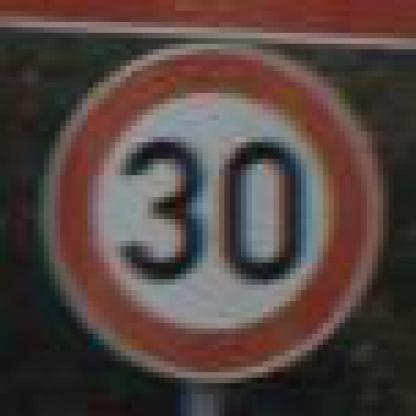

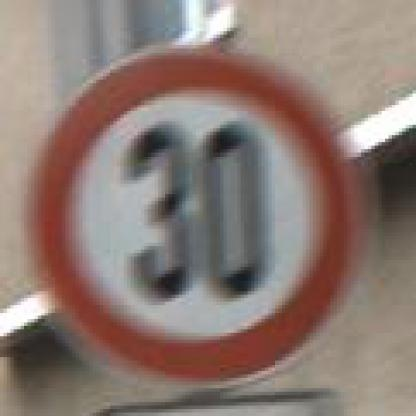

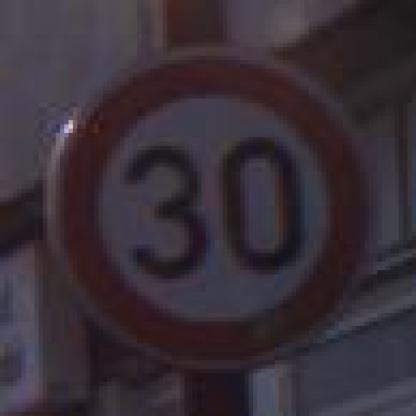

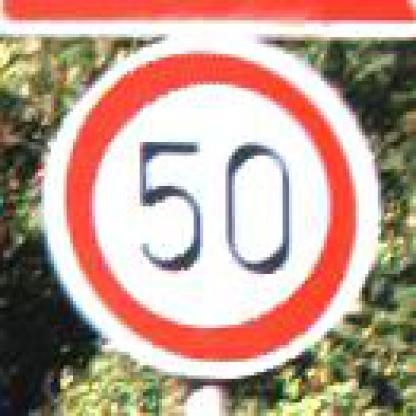

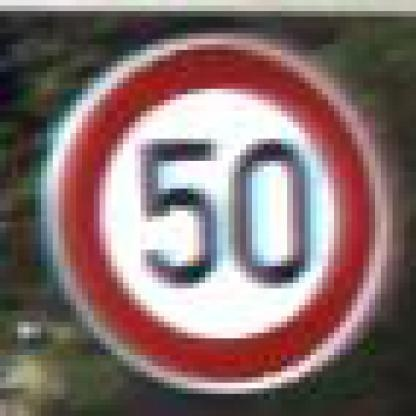

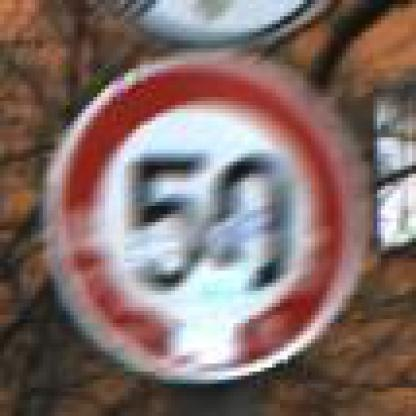

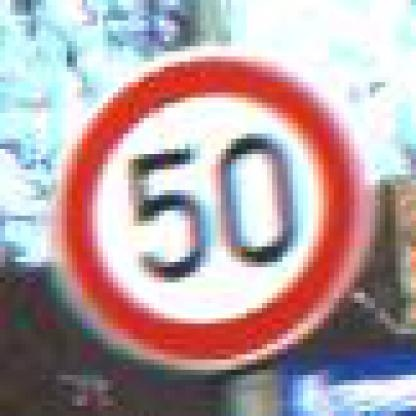

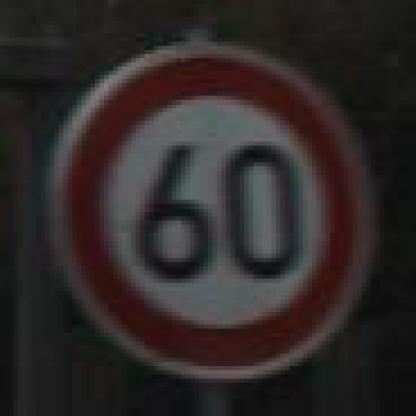

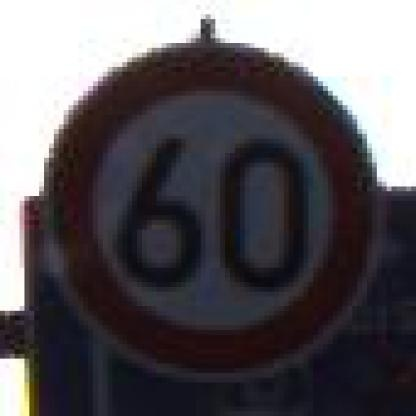

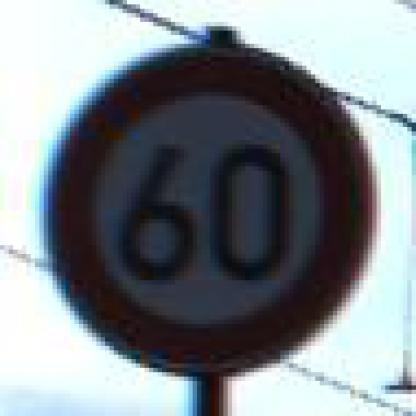

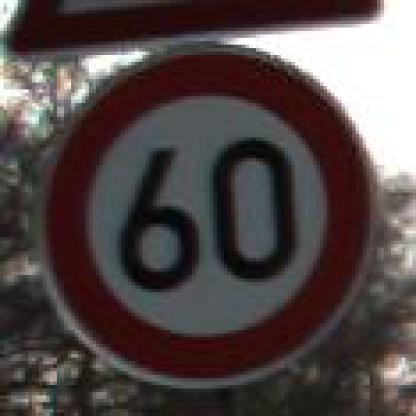

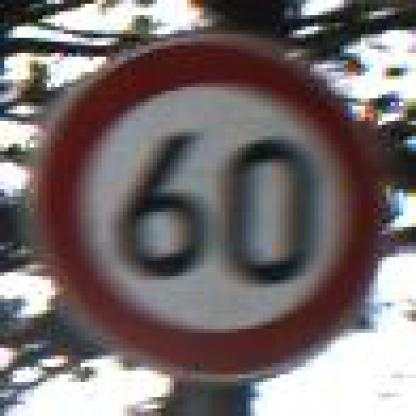

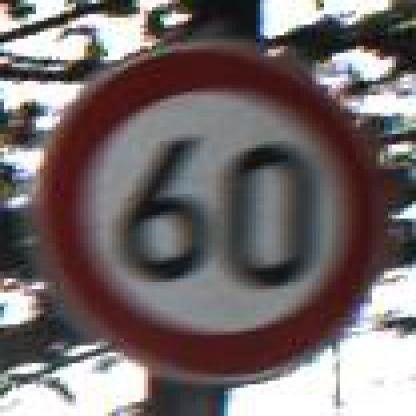

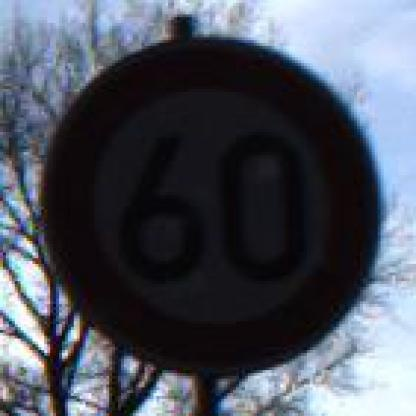

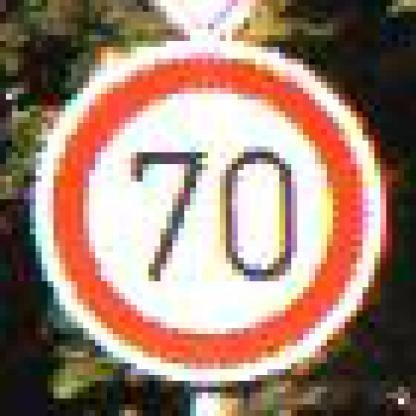

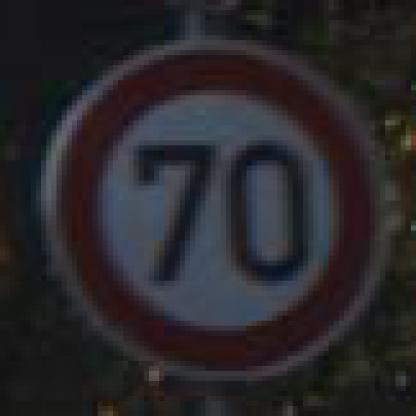

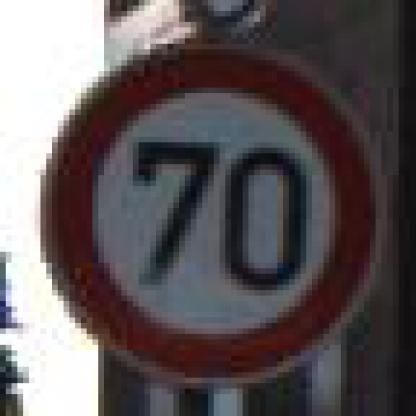

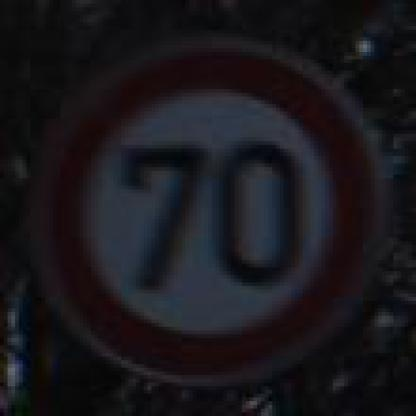

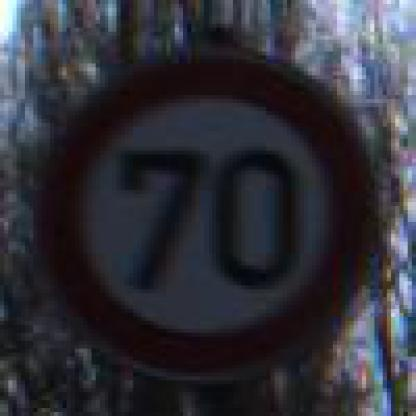

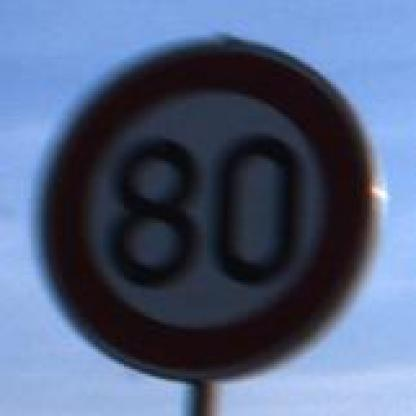

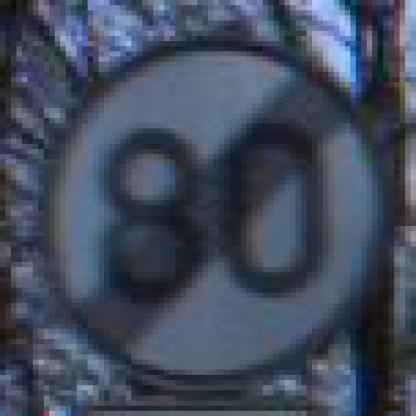

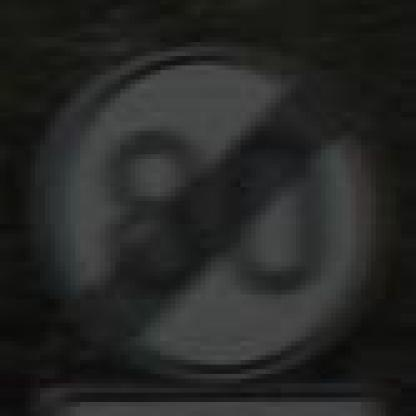

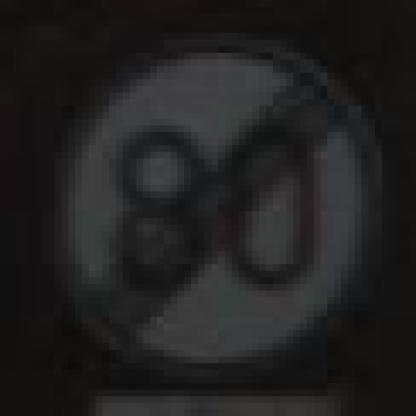

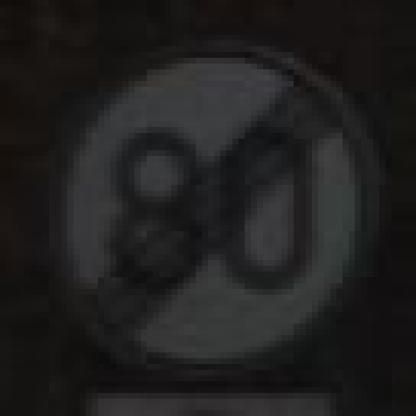

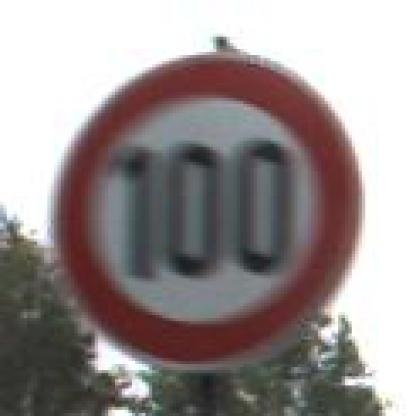

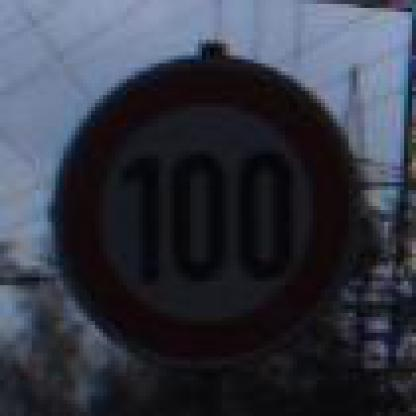

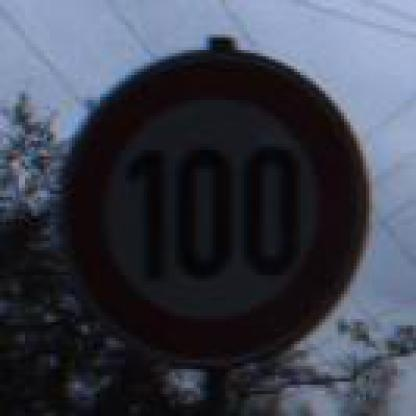

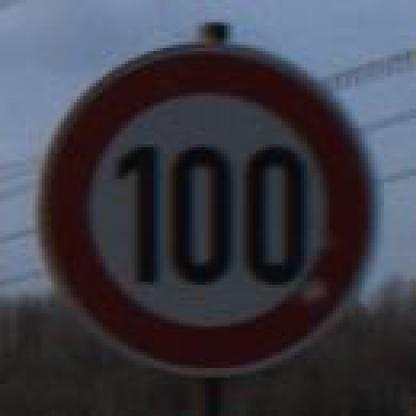

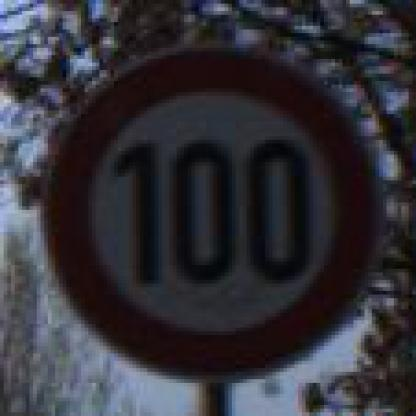

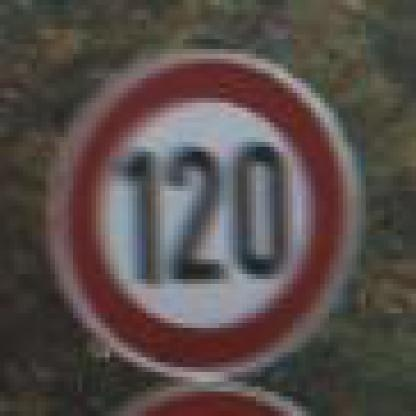

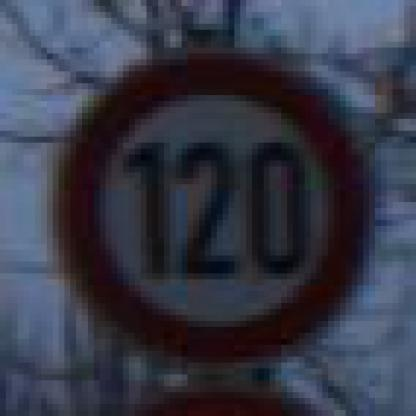

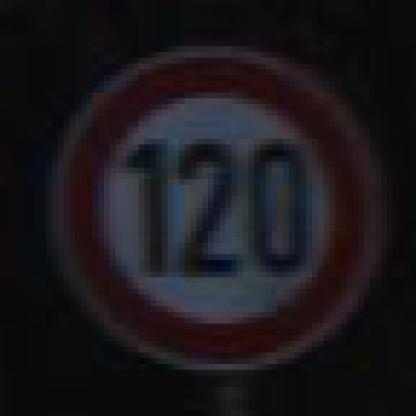

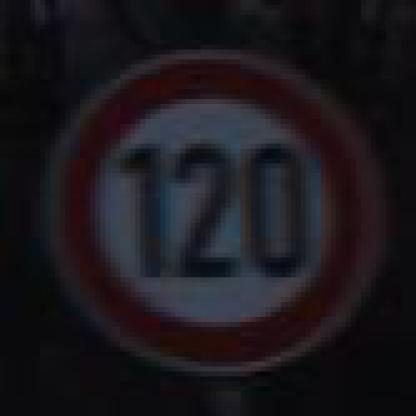

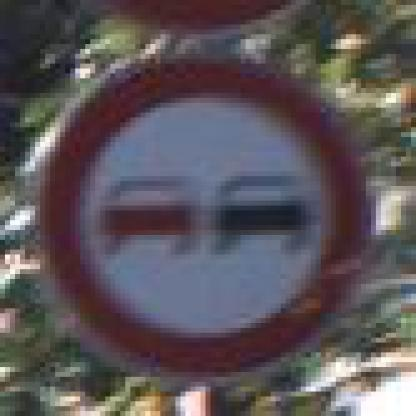

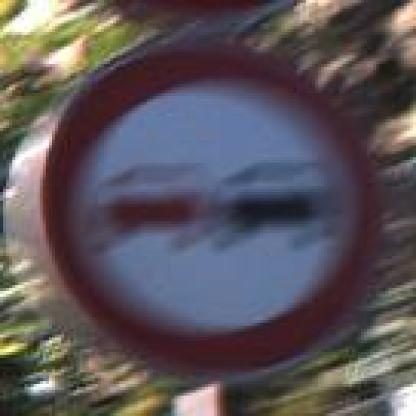

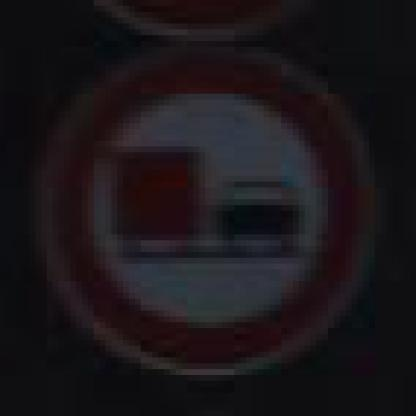

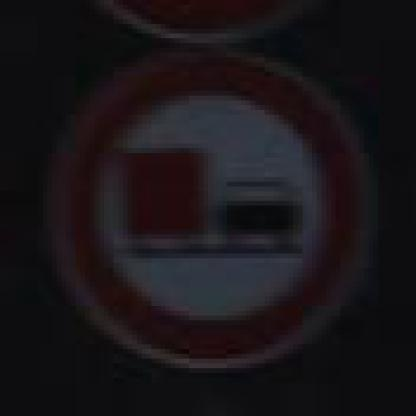

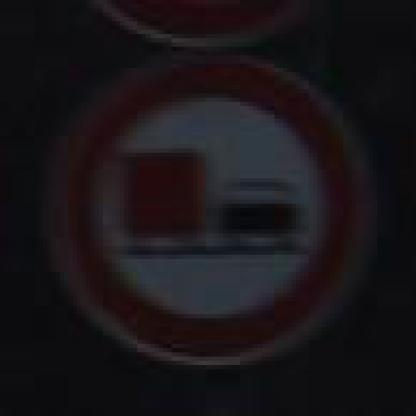

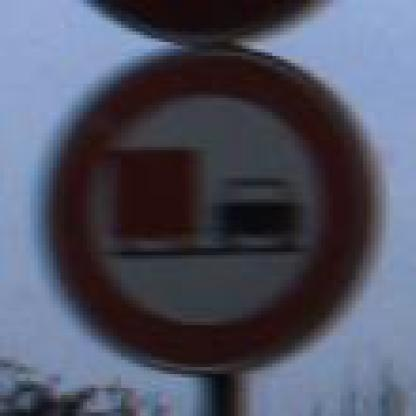

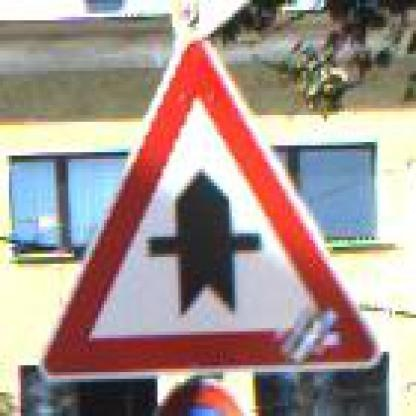

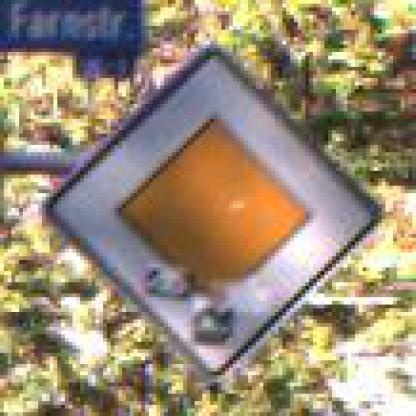

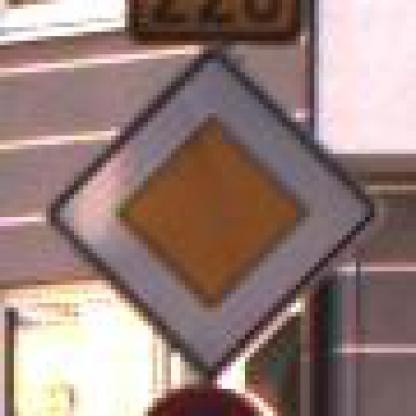

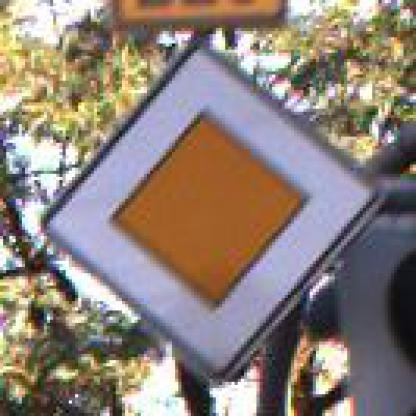

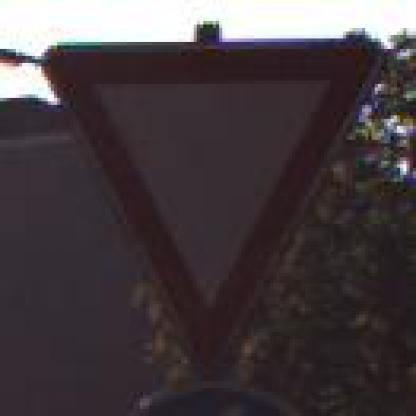

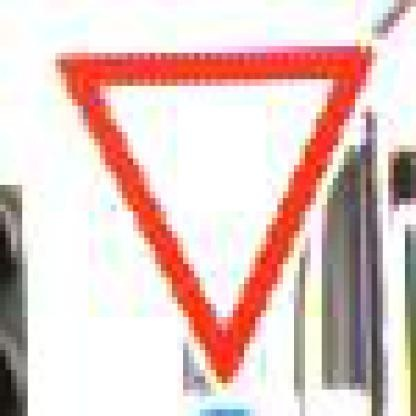

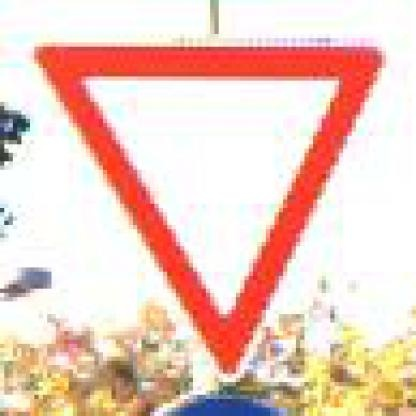

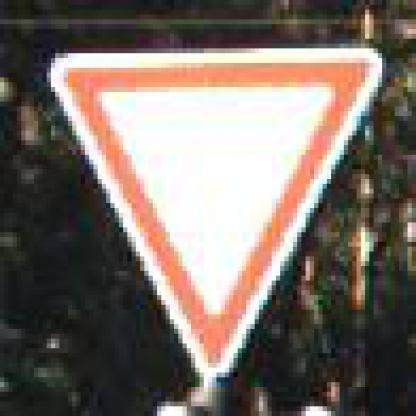

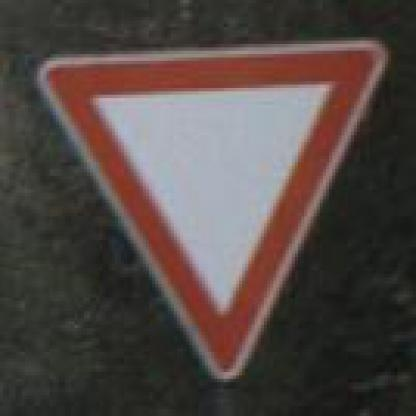

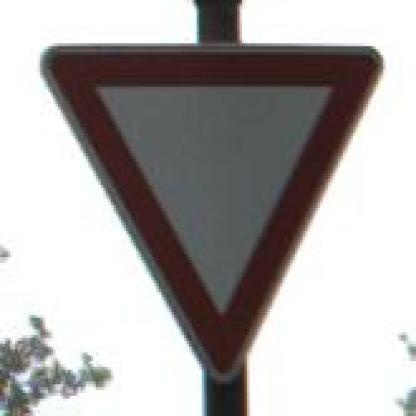

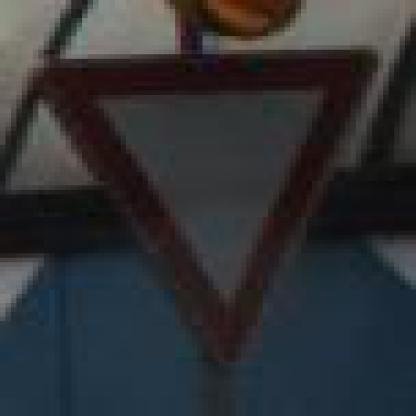

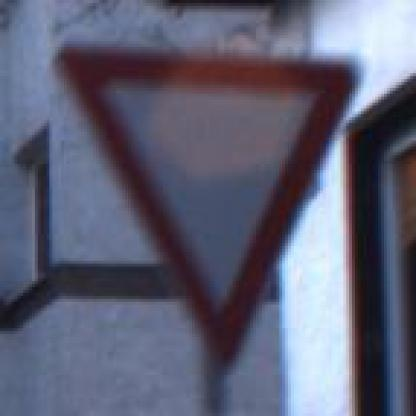

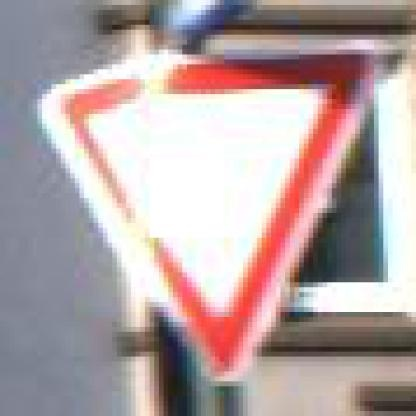

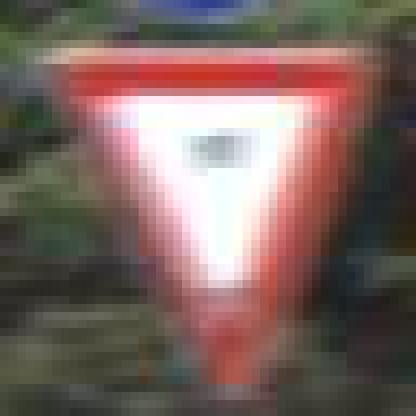

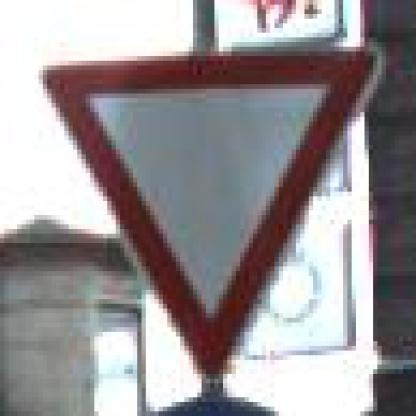

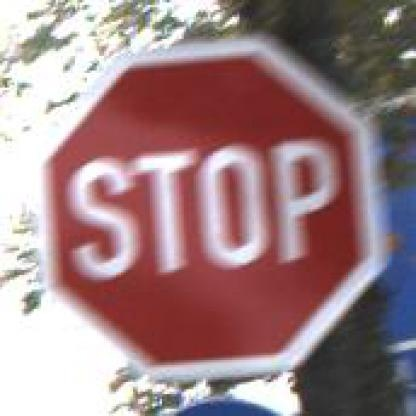

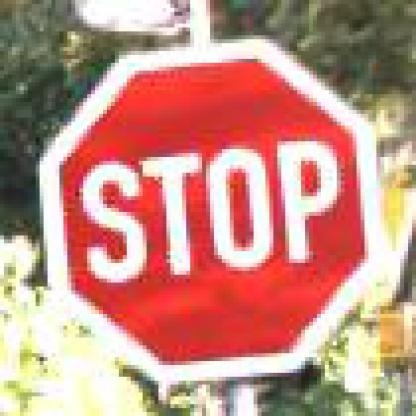

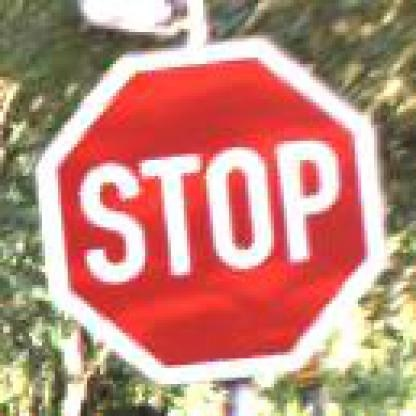

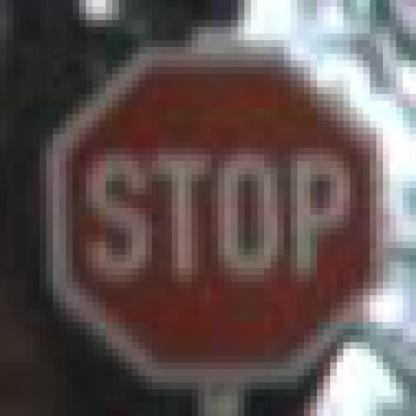

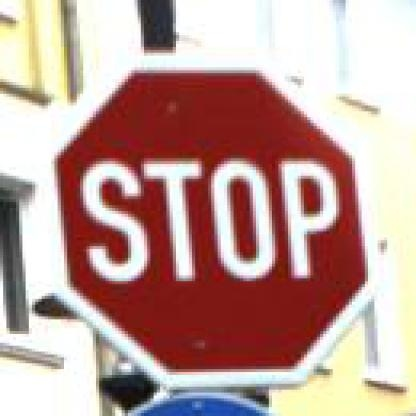

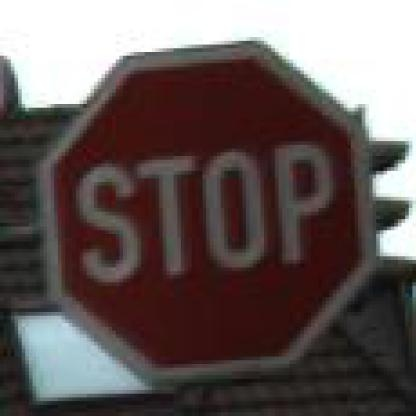

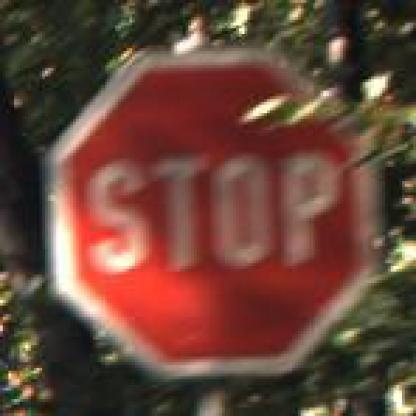

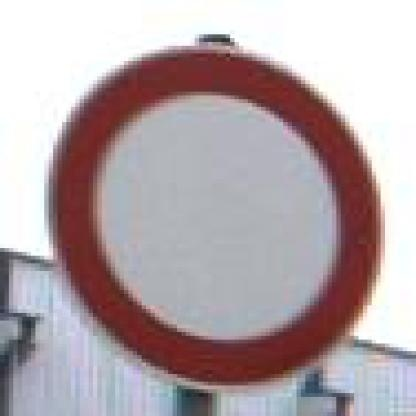

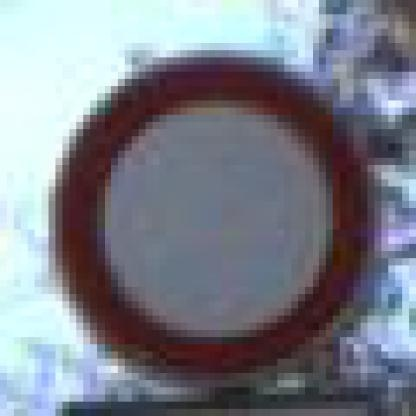

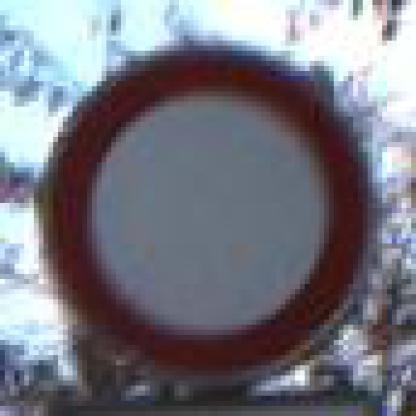

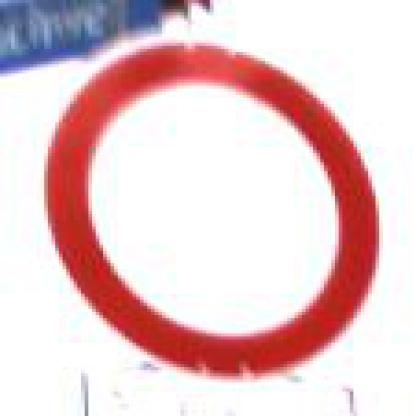

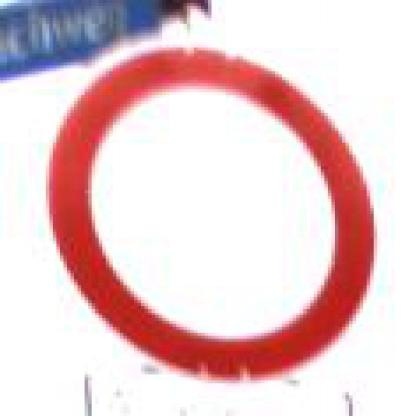

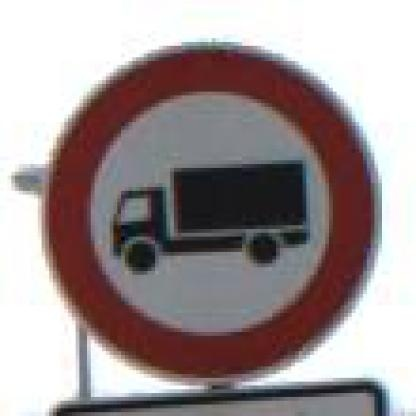

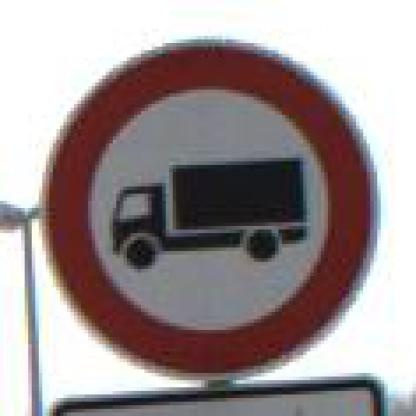

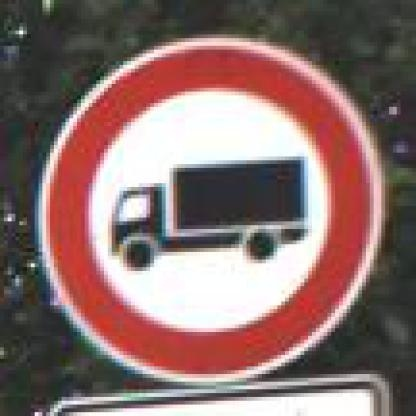

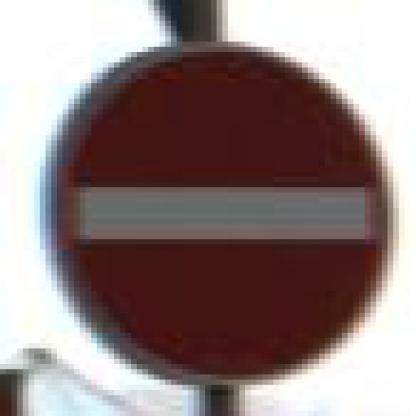

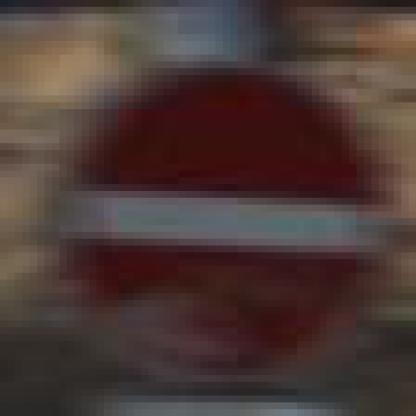

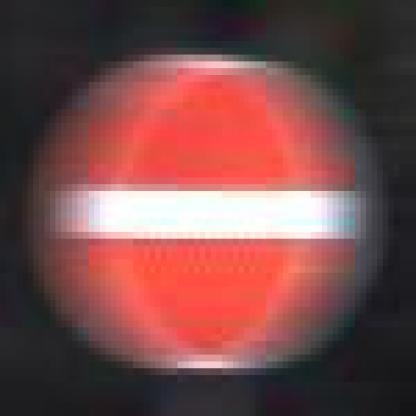

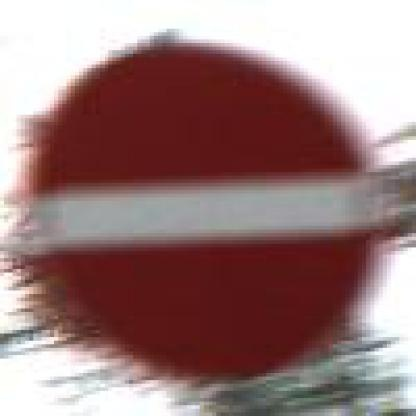

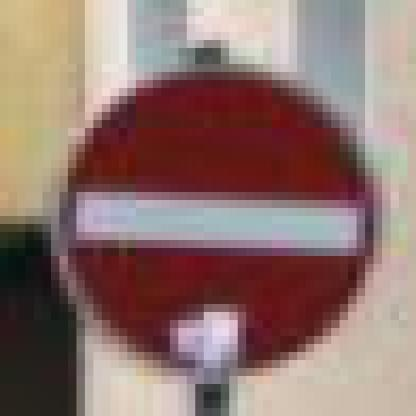

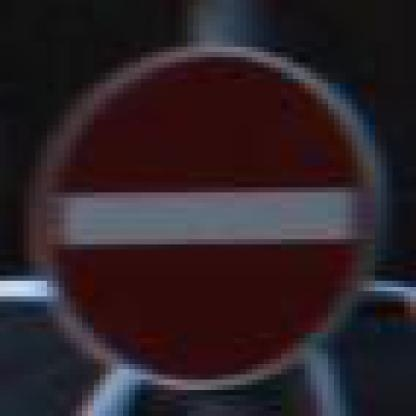

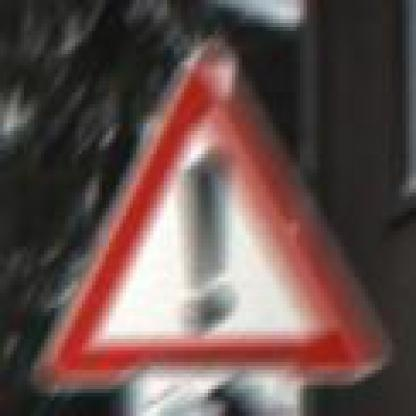

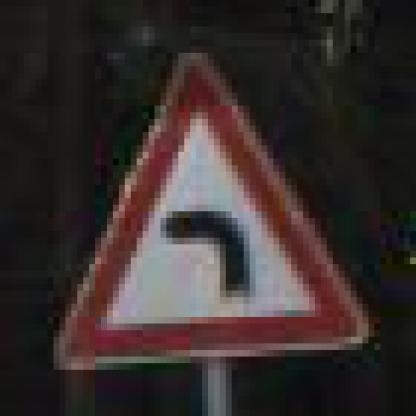

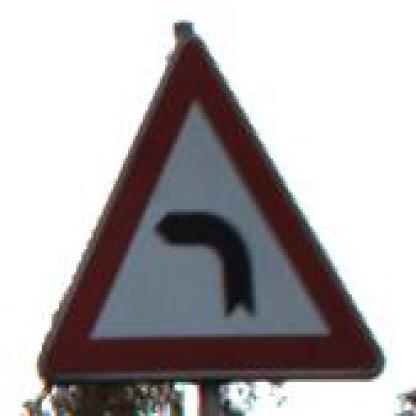

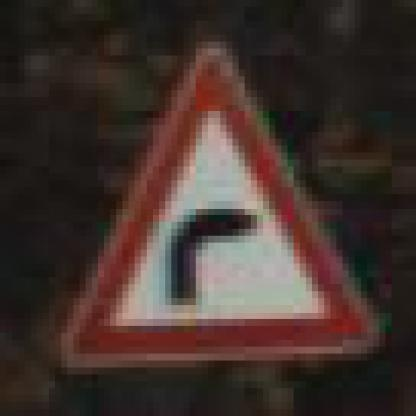

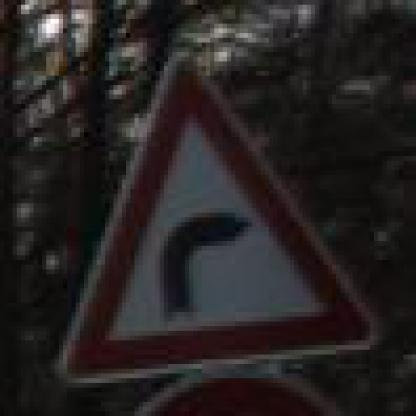

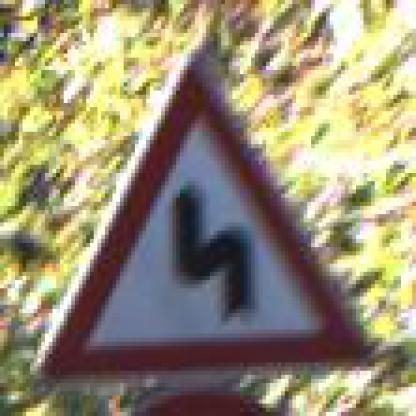

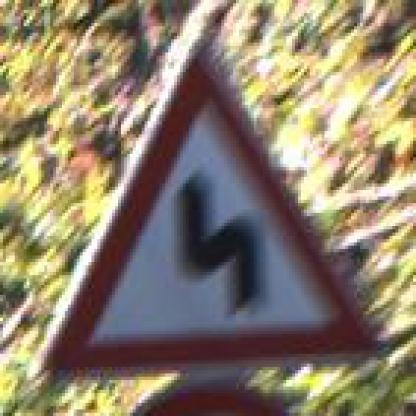

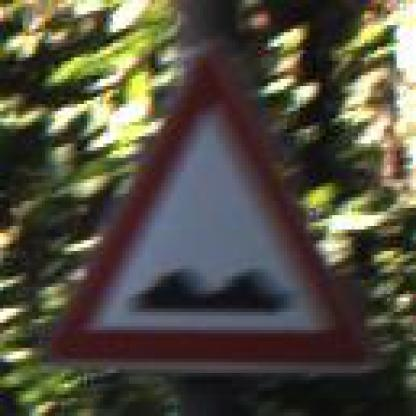

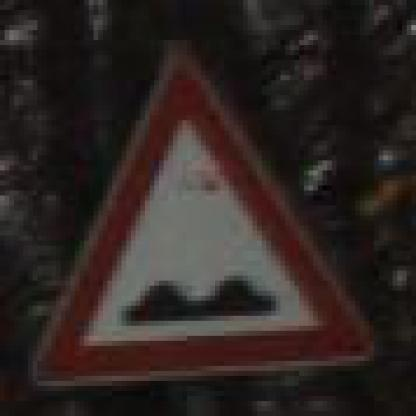

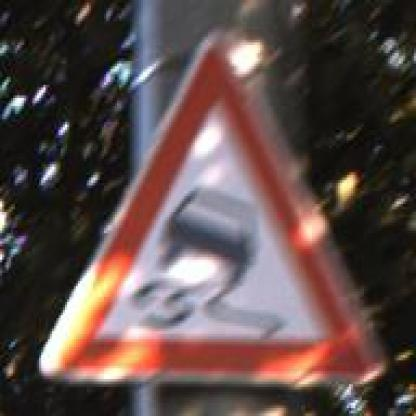

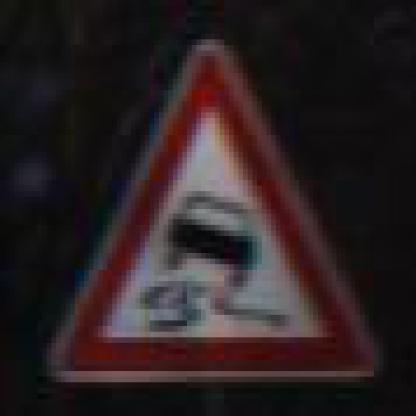

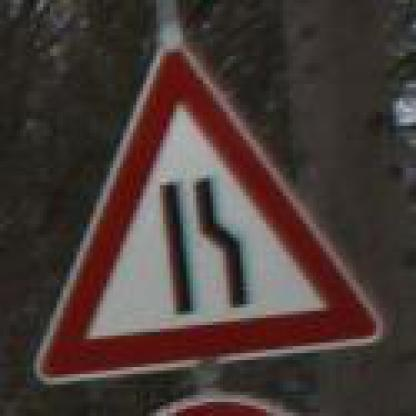

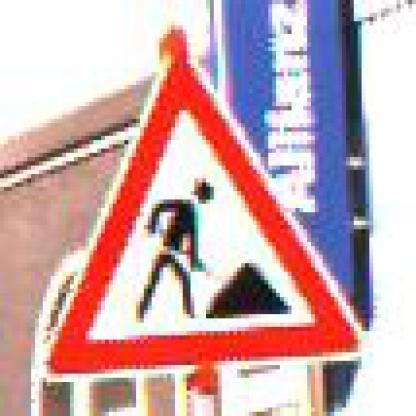

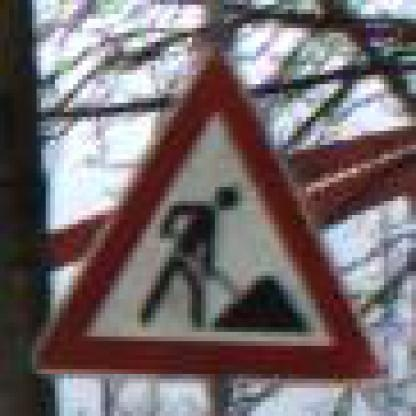

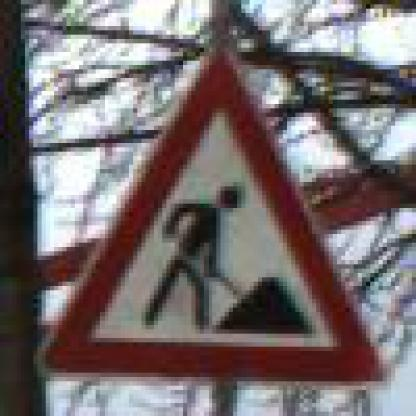

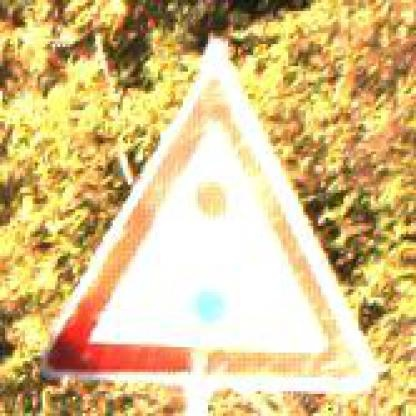

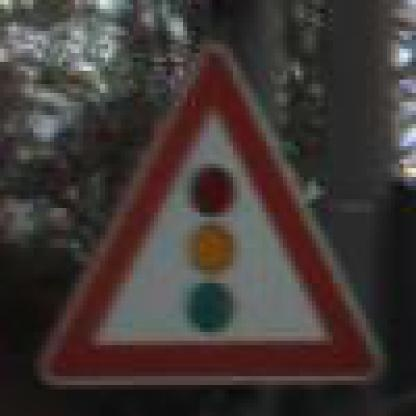

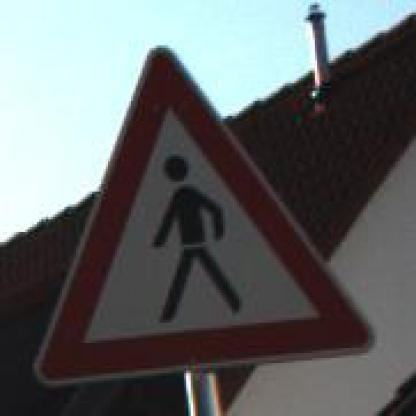

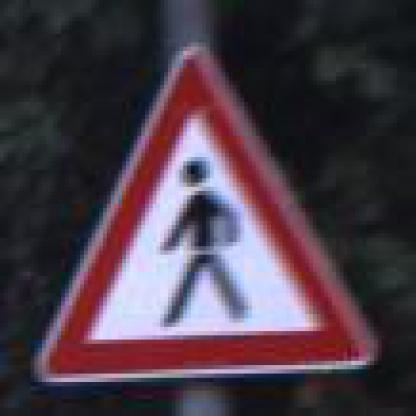

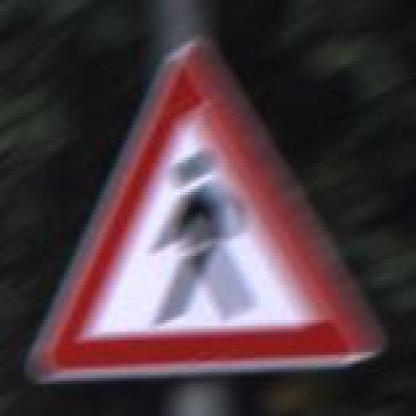

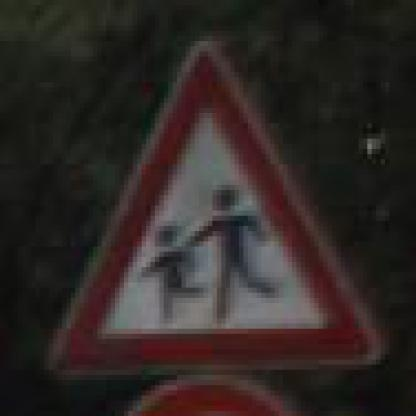

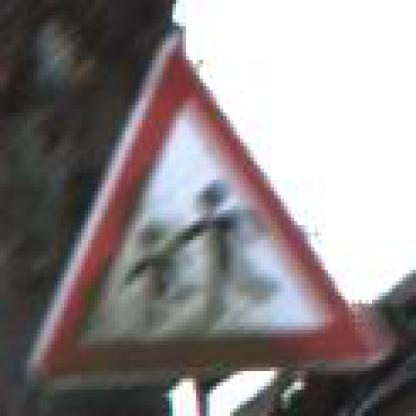

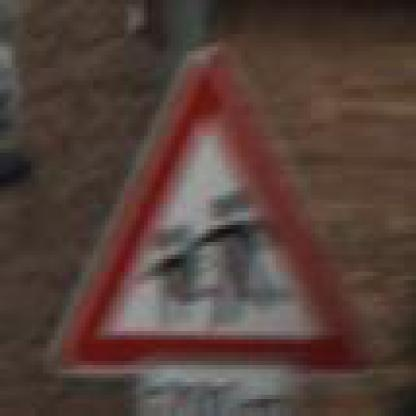

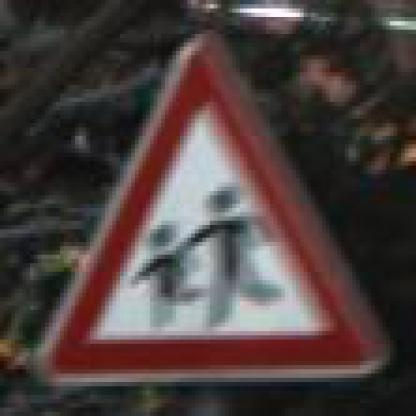

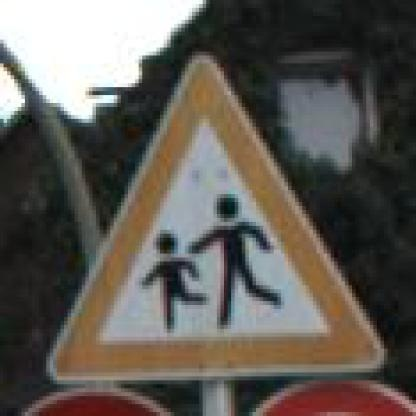

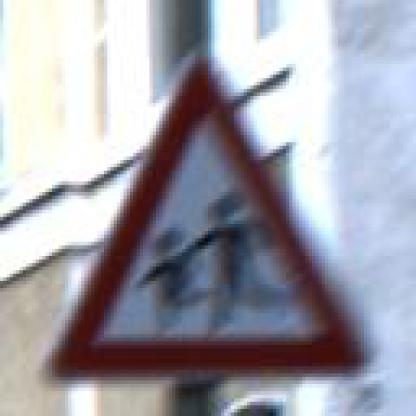

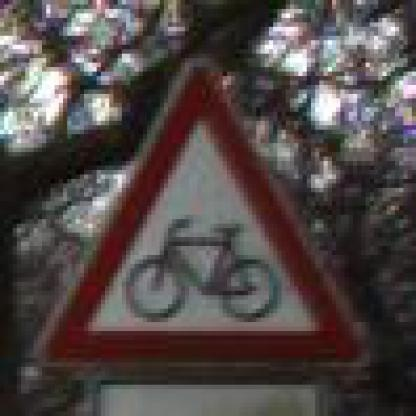

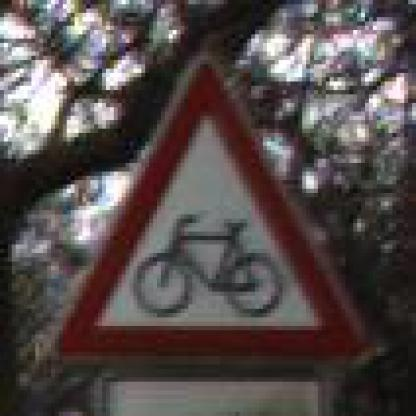

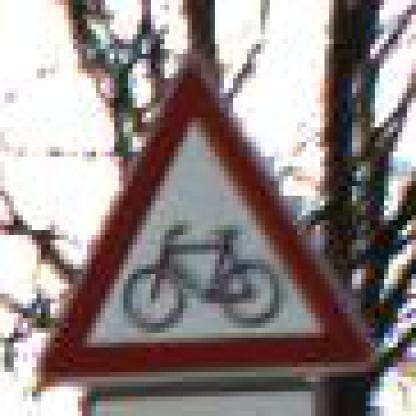

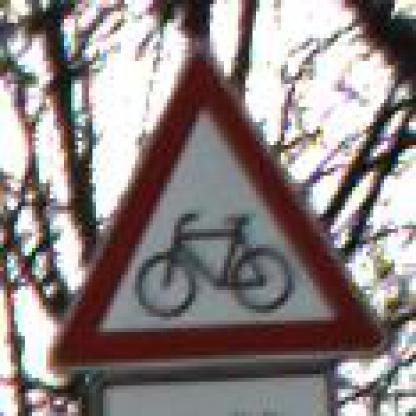

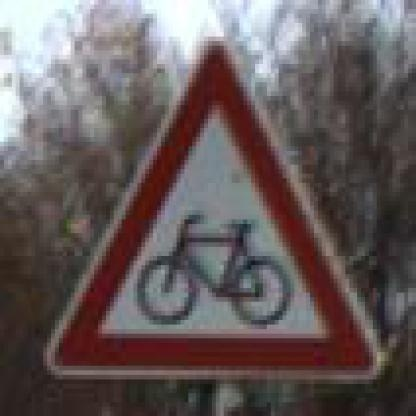

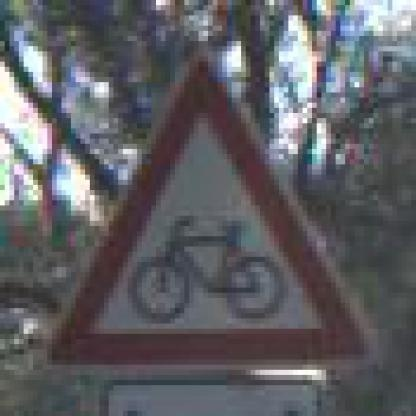

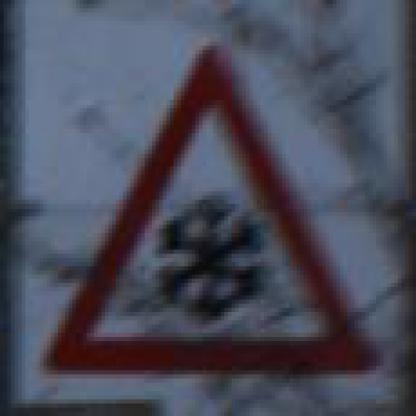

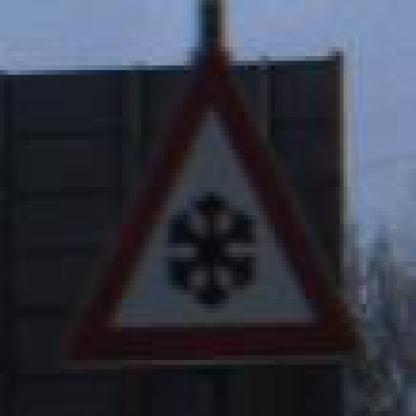

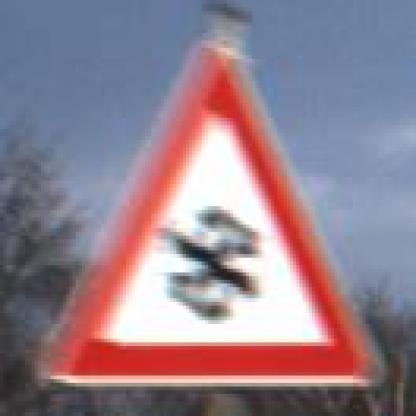

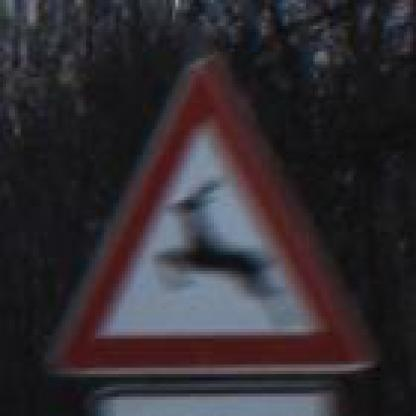

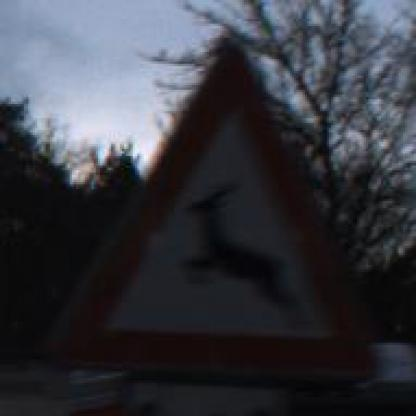

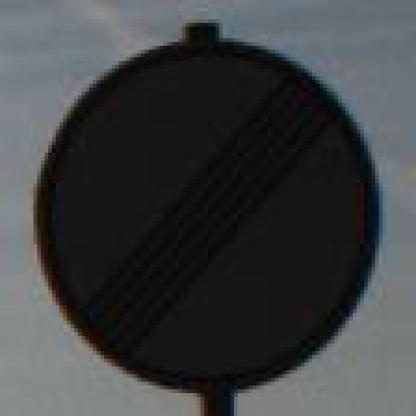

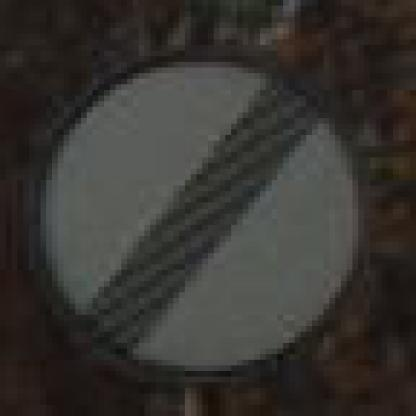

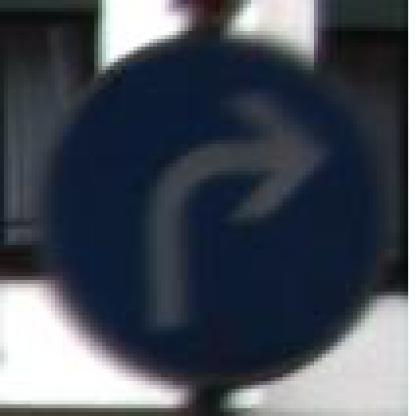

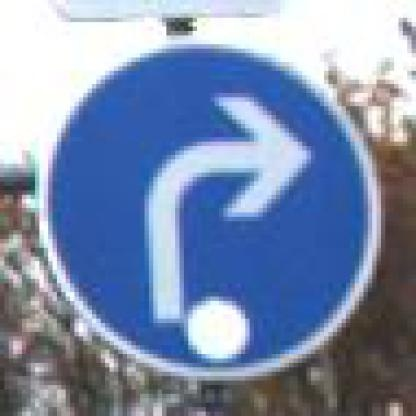

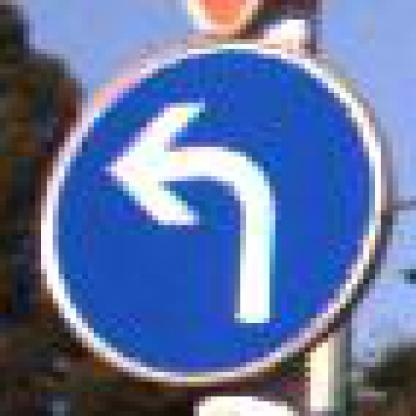

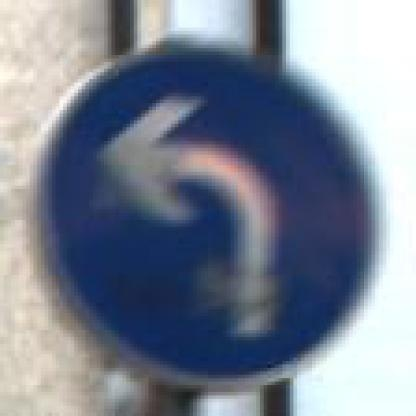

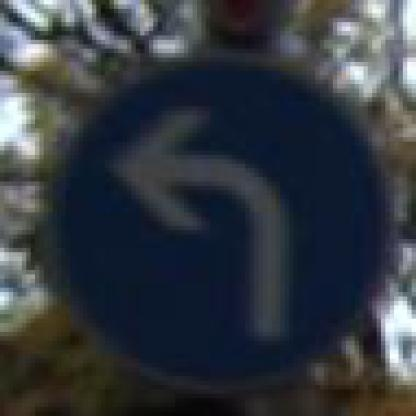

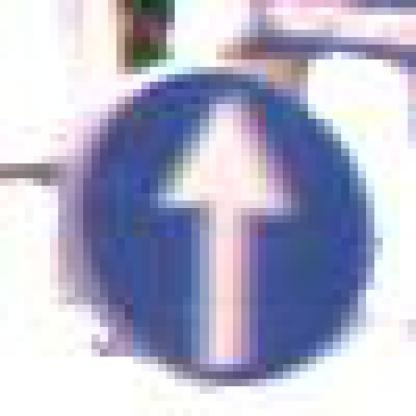

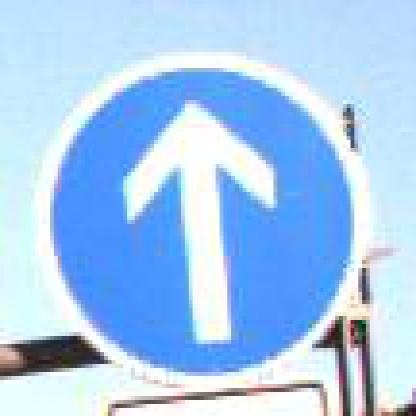

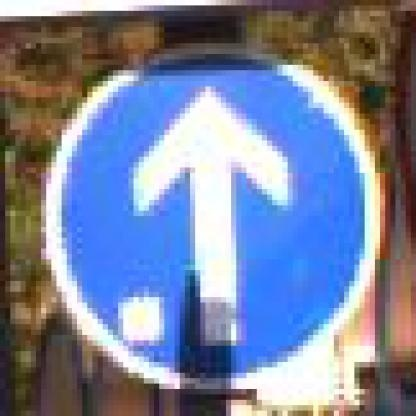

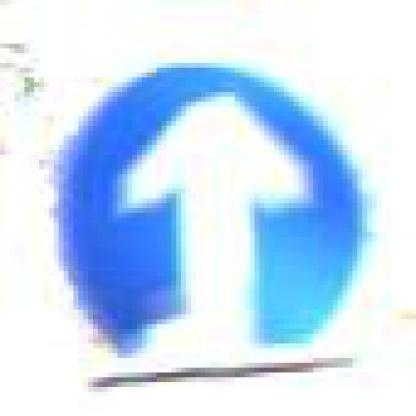

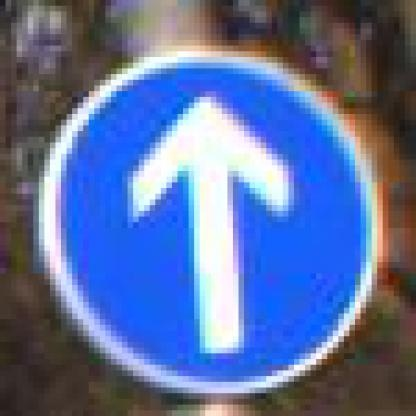

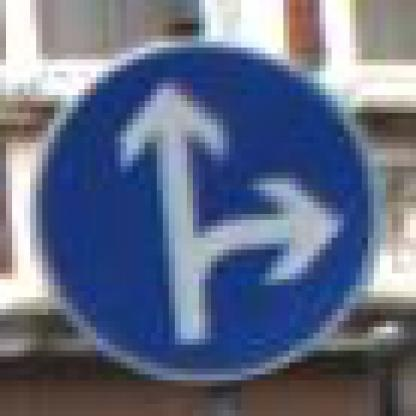

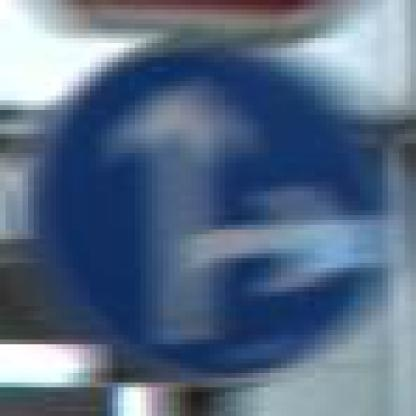

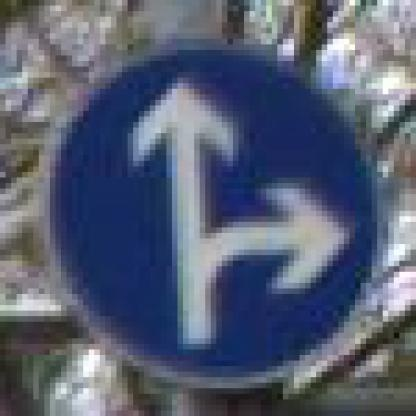

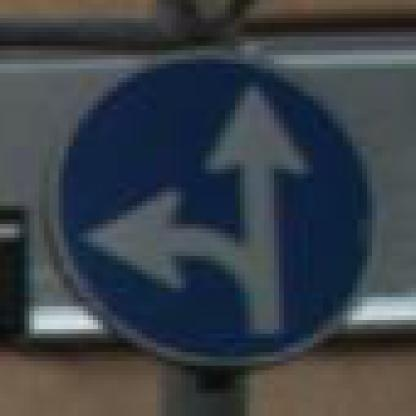

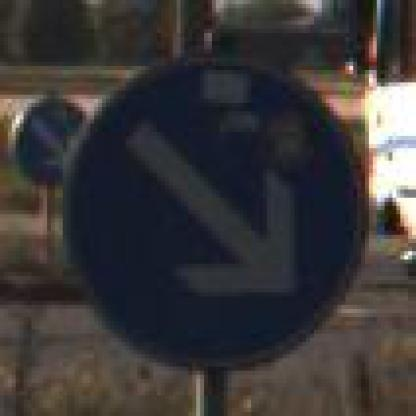

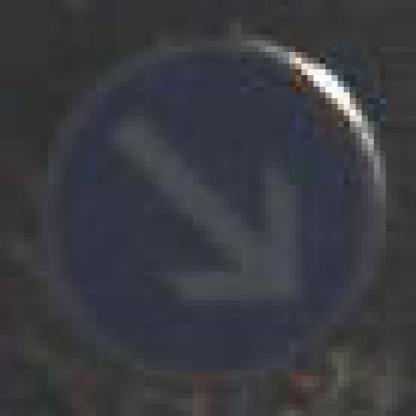

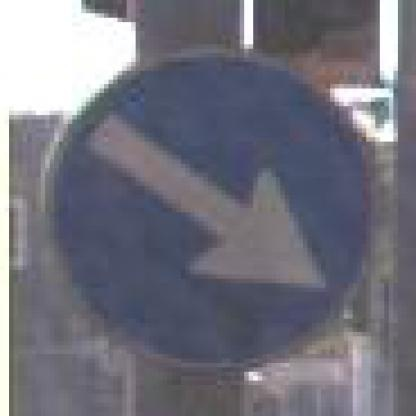

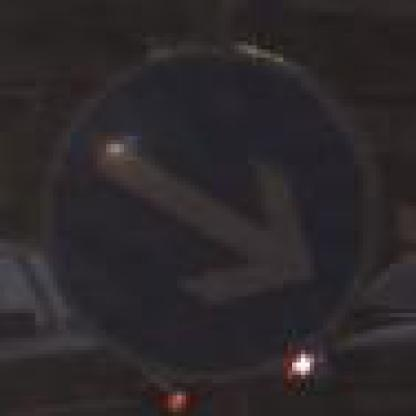

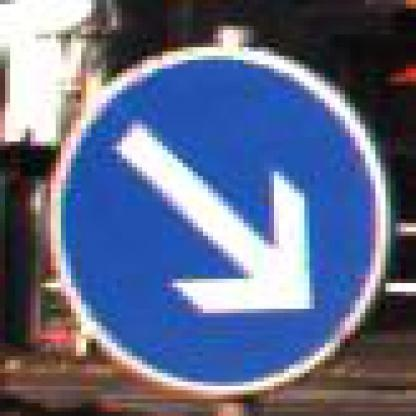

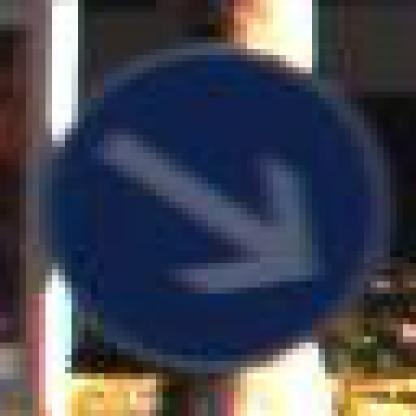

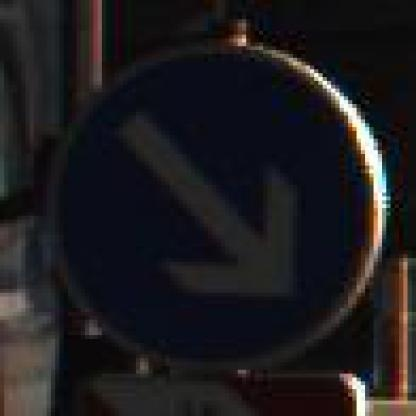

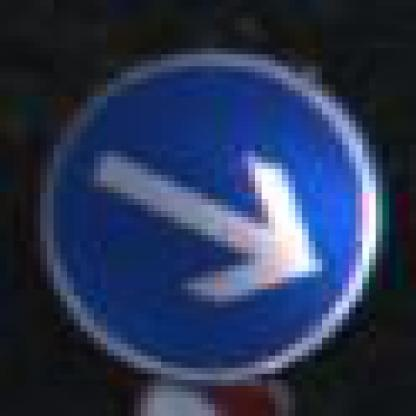

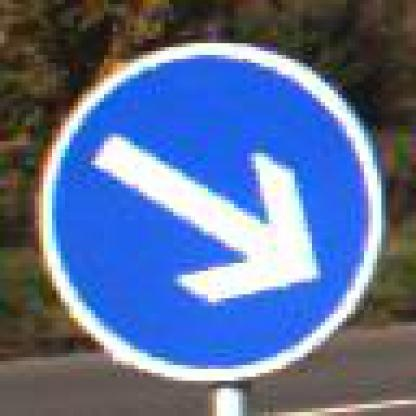

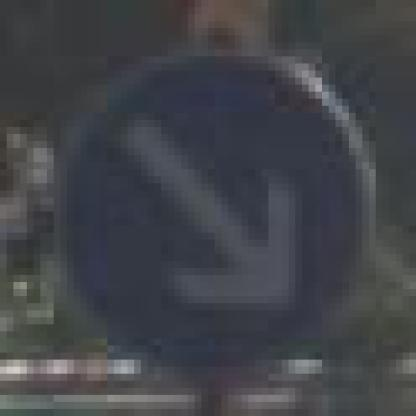

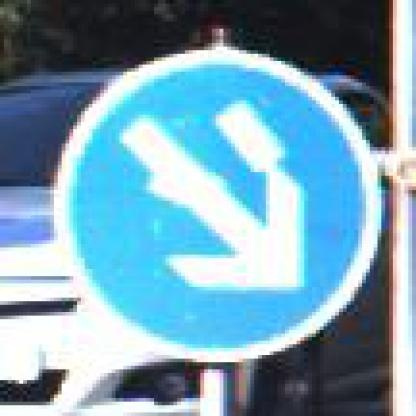

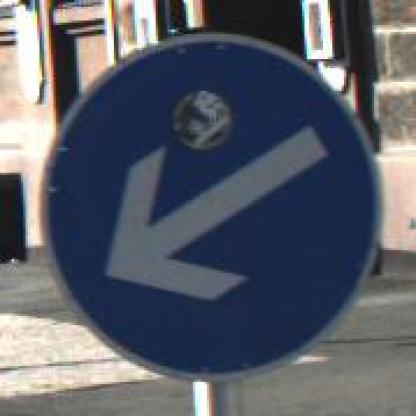

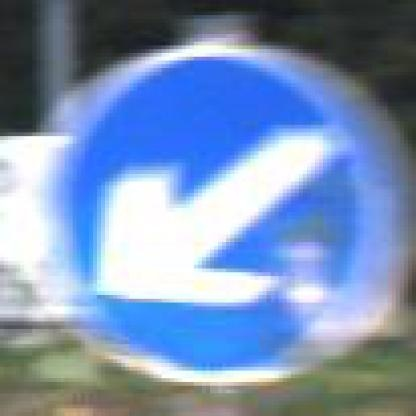

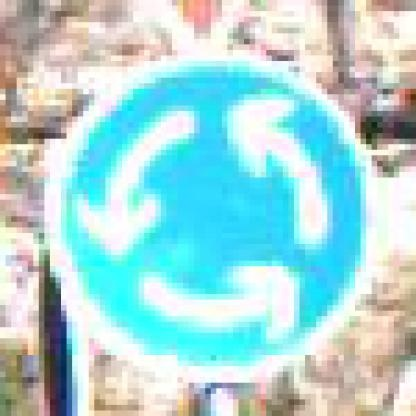

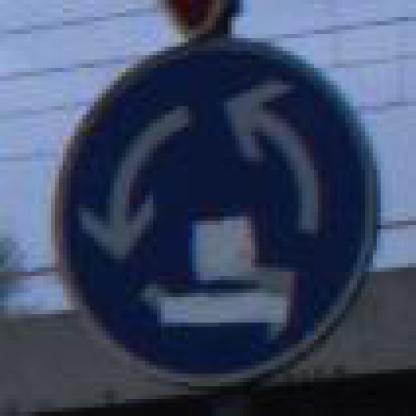

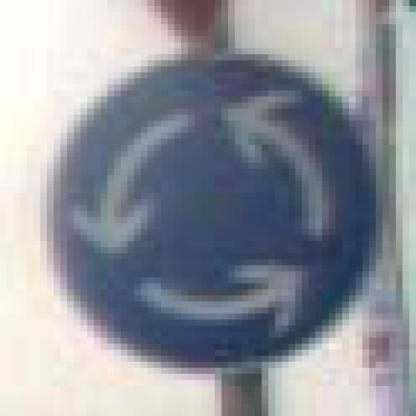

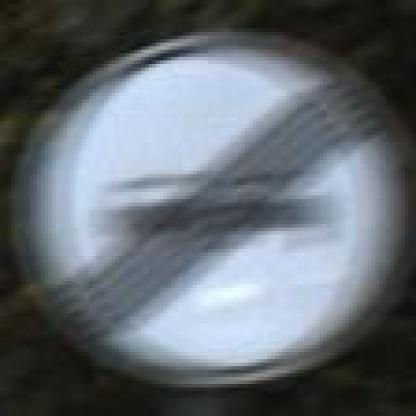

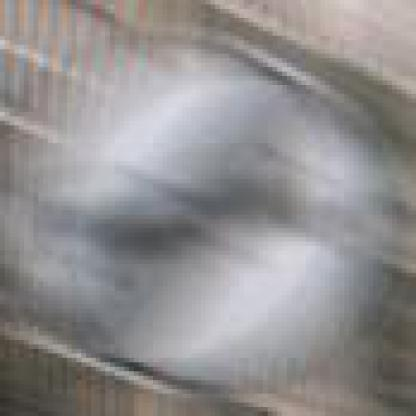

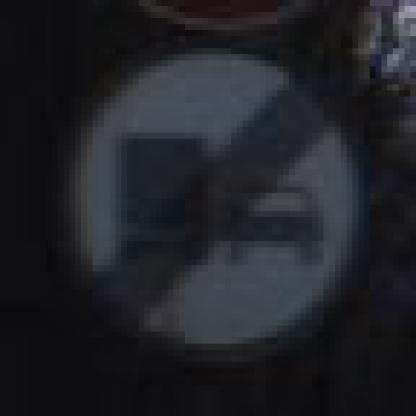

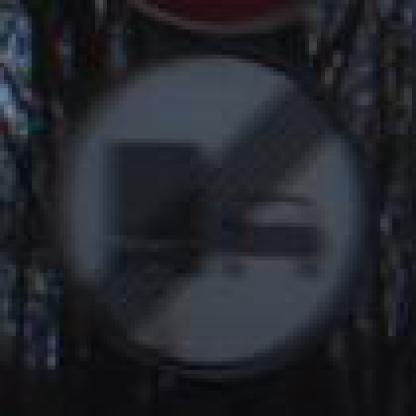

In [6]:
import glob
from IPython.display import Image, display

i = 0
limit = 10000

for imageName in glob.glob('C:/Users/ozana/Desktop/computer_vision/traffic-sign-recognition/yolov7/runs/detect/exp8/*.jpg'):
    if i < limit:
        display(Image(filename=imageName))
        print('\n')
    i = i + 1